# K-means

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Data

Gaussian data with different means and standard deviations, to act as our "clusters".

In [34]:
def generate_gaussian(samples: int, mean: tuple[float, float], std: tuple[float, float]):
    return std*np.random.randn(samples, 2) + mean

data = np.concat([generate_gaussian(100, tuple((10*np.random.random_sample((2,))).tolist()), tuple(np.random.random_sample((2,)).tolist())) for _ in range(5)])

In [35]:
data.shape

(500, 2)

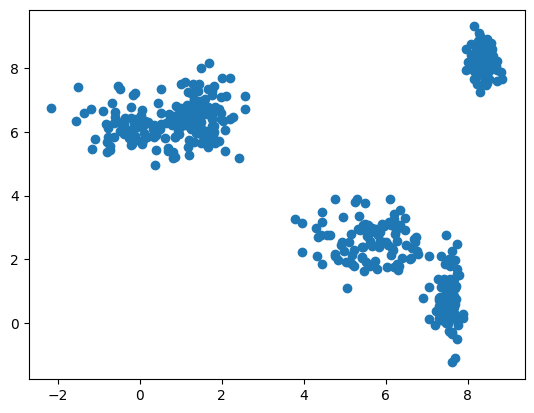

In [36]:
plt.scatter(data[:, 0], data[:, 1])

## Centroid Initialization

A naive implementation would be $k$ randomly chosen points from the dataset. The problem occurs when suboptimal initialization leads to suboptimal clustering, as a result of centroids that begin too close together. In kmeans++, we punish points for being close to previously selected centroids. 

In [ ]:
def distance(pp: np.array, cc: np.array) -> float:
    """ generate Euclidean distance (L2 norm) """
    return np.linalg.norm(pp-cc)

# Initializing centroid using kmeans++ methodology: https://theory.stanford.edu/~sergei/papers/kMeansPP-soda.pdf
def centroid_initializer(k: int, data: np.array) -> list[np.array]:
    
    # choose first center, initialize array
    centers = [data[np.random.choice(len(data))]]
    
    while len(centers) < k:
        distances = []
        # for each point, find smallest distance to an already selected center
        for pp in data:
            distances.append(np.min([distance(pp, c)**2 for c in centers]))
            
        # normalize distances to a prob. distribution
        total = np.sum(distances)
        probs = [d / total for d in distances]
        
        # choose next center
        centers.append(data[np.random.choice(len(data), p=probs)])
        
    return centers

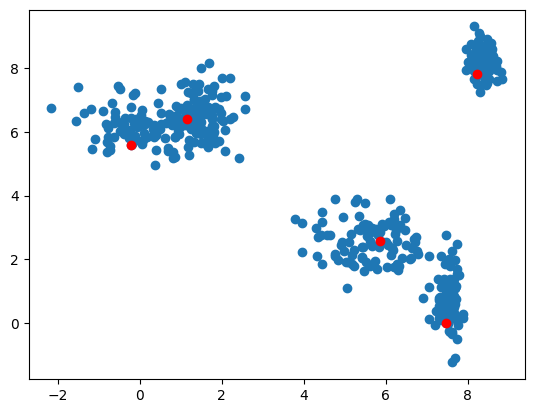

In [56]:
centers = np.array(centroid_initializer(5, data))

plt.scatter(data[:,0], data[:,1])
plt.scatter(centers[:,0], centers[:,1], c="r")

plt.show()

## Kmeans

In [104]:
def kmeans(k: int, data: np.array):
    # initialize centroids
    centroids, old_centroids = np.array(centroid_initializer(k, data)), None
    
    # build clusters and centroids until algorithm converges
    clusters = [[] for _ in range(k)]
    while type(old_centroids)==None or not np.array_equiv(centroids, old_centroids):
        clusters = [[] for _ in range(k)]
        
        for pp in data:
            distances = [distance(pp, c) for c in centroids]
            clusters[np.argmin(distances)].append(pp)
        
        old_centroids = centroids
        centroids = [np.average(cl, axis=0) for cl in clusters]
        
    return [np.array(c) for c in clusters]

In [105]:
clusters = kmeans(5, data)

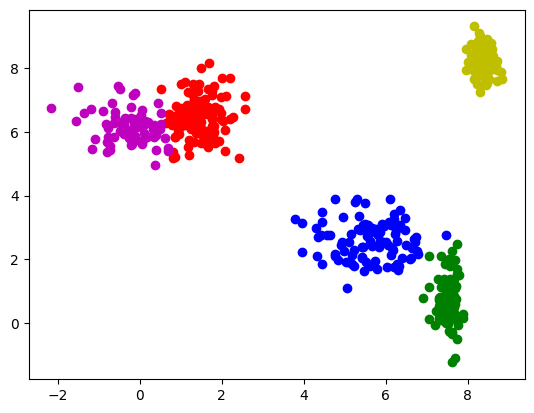

In [106]:
colors = ["r", "g", "b", "y", "m"]
for i, cl in enumerate(clusters):
    plt.scatter(cl[:,0], cl[:,1], c=colors[i])
    
plt.show()